# Linear Regression

In [15]:
import pandas as pd
import seaborn as sn
df= pd.read_csv('Admission_Prediction.csv')

In [16]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [17]:
df.drop(columns=['Serial No.'],inplace=True)

In [18]:
df.isnull().sum()

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

<AxesSubplot:xlabel='GRE Score', ylabel='Count'>

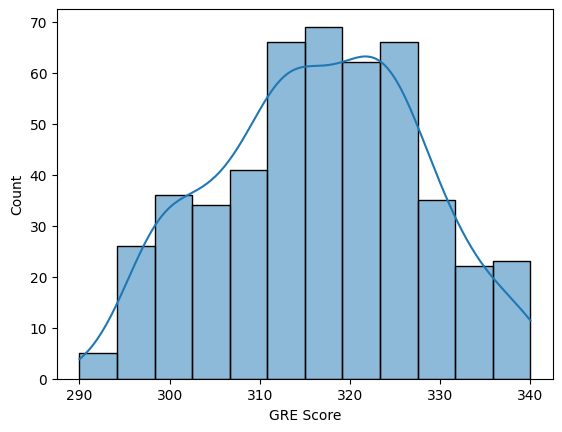

In [19]:
sn.histplot(df['GRE Score'],kde=True)

In [20]:
df['University Rating'].fillna(df['University Rating'].mode()[0],inplace=True)

In [21]:
df['GRE Score'].fillna(df['GRE Score'].mean(),inplace=True)

In [22]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mean(),inplace=True)

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR'}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit'}>, <AxesSubplot:>]],
      dtype=object)

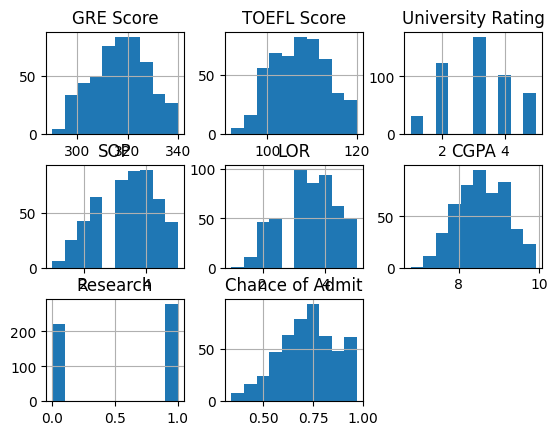

In [23]:
df.hist()

In [24]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [25]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


# CASE 1: without scaling the data (linear regression)

In [26]:
from sklearn.linear_model import LinearRegression,ridge_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
ind=df.columns[0:len(df.columns)-1]
dep=df.columns[-1]
x = df[ind]
y = df[dep]
X=x.values
Y=y.values
model=LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=355)
model.fit(x_train,y_train)
# model.coef_
df['predict']=model.predict(x.values)

In [27]:
model.score(x_train,y_train)

0.8415250484247909

In [28]:
model.score(x_test,y_test)

0.7534898831471069

In [29]:
len(x_train)

375

In [30]:
len(y_train)

375

In [31]:
len(x_test)

125

In [32]:
len(y_test)

125

In [33]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = model.score(x,y)
    n = x_train.shape[0]
    p = x_train.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [34]:
adj_r2(x_train,y_train)

0.8385023654247188

In [35]:
adj_r2(x_test,y_test)

0.7487880553052261

In [36]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,predict
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92,0.956552
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76,0.806160
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72,0.650073
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80,0.744834
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65,0.637029
...,...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87,0.840989
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96,0.995957
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93,0.945631
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73,0.704119


In [37]:
r2_score(df['Chance of Admit'],df['predict']) #500 rows are taken into consideration

0.8196118757837627

In [38]:
import pickle
with open('withoutscale','wb') as f:
    pickle.dump(model,f)

In [39]:
with open('withoutscale','rb') as f:
    ob=pickle.load(f)

In [40]:
ob.predict(x_train)

array([0.51961845, 0.92641531, 0.65268603, 0.45367794, 0.7261045 ,
       0.56157264, 0.64399746, 0.6717782 , 0.88462116, 0.5386425 ,
       0.86532148, 0.79615794, 0.87876975, 0.65391022, 0.82981008,
       0.83628496, 0.59987779, 0.67211946, 0.71566626, 0.62522037,
       0.58785288, 0.84607886, 0.91014103, 0.47815708, 0.7278715 ,
       0.65237293, 0.82712003, 0.6359292 , 0.72587529, 0.75234061,
       0.51252159, 0.94506612, 0.6755415 , 0.61353761, 0.69275363,
       0.63490871, 0.79588503, 0.79721814, 0.60981385, 0.70015986,
       0.80420222, 0.76643529, 0.67653552, 0.69393134, 0.57781969,
       0.85616644, 0.57673715, 0.69877244, 0.78172433, 0.55107767,
       0.69755156, 0.71843697, 0.53309299, 0.68272674, 0.71027383,
       0.64046325, 0.69857504, 0.53228787, 0.50208129, 0.89510618,
       0.56678189, 0.51766808, 0.81335433, 0.84772852, 0.70645241,
       0.59739162, 0.79918831, 0.6033345 , 0.59393044, 0.71228864,
       0.62009763, 0.74220017, 0.65059942, 0.54180481, 0.69289

In [41]:
model.coef_

array([0.00210724, 0.0018642 , 0.00382886, 0.00144171, 0.0160296 ,
       0.13047543, 0.01990266])

In [42]:
model.intercept_

-1.3464908093891008

# Lasso Regression on same Data

In [43]:
x_train

array([[303.        ,  98.        ,   1.        , ...,   2.5       ,
          7.65      ,   0.        ],
       [316.55876289, 119.        ,   5.        , ...,   4.5       ,
          9.7       ,   1.        ],
       [310.        , 106.        ,   4.        , ...,   2.5       ,
          8.36      ,   0.        ],
       ...,
       [304.        ,  97.        ,   2.        , ...,   2.        ,
          7.64      ,   0.        ],
       [339.        , 114.        ,   5.        , ...,   4.5       ,
          9.76      ,   1.        ],
       [321.        , 114.        ,   4.        , ...,   5.        ,
          9.12      ,   0.        ]])

In [44]:
y_train

array([0.56, 0.95, 0.57, 0.47, 0.72, 0.61, 0.73, 0.56, 0.92, 0.38, 0.87,
       0.77, 0.92, 0.62, 0.78, 0.84, 0.62, 0.69, 0.74, 0.72, 0.67, 0.85,
       0.91, 0.37, 0.71, 0.65, 0.84, 0.46, 0.67, 0.52, 0.44, 0.89, 0.61,
       0.49, 0.7 , 0.64, 0.61, 0.78, 0.67, 0.7 , 0.8 , 0.8 , 0.71, 0.74,
       0.55, 0.88, 0.44, 0.57, 0.78, 0.7 , 0.71, 0.74, 0.59, 0.63, 0.65,
       0.69, 0.7 , 0.69, 0.44, 0.9 , 0.57, 0.49, 0.82, 0.83, 0.78, 0.62,
       0.8 , 0.65, 0.71, 0.71, 0.65, 0.63, 0.6 , 0.53, 0.7 , 0.85, 0.64,
       0.78, 0.75, 0.76, 0.67, 0.79, 0.68, 0.71, 0.73, 0.66, 0.53, 0.66,
       0.62, 0.66, 0.73, 0.69, 0.5 , 0.6 , 0.76, 0.63, 0.92, 0.91, 0.51,
       0.71, 0.97, 0.86, 0.91, 0.93, 0.57, 0.73, 0.83, 0.84, 0.96, 0.74,
       0.94, 0.46, 0.62, 0.7 , 0.64, 0.73, 0.64, 0.84, 0.83, 0.58, 0.58,
       0.66, 0.64, 0.84, 0.81, 0.77, 0.53, 0.54, 0.58, 0.8 , 0.53, 0.63,
       0.94, 0.83, 0.72, 0.78, 0.58, 0.78, 0.76, 0.73, 0.57, 0.91, 0.88,
       0.96, 0.67, 0.59, 0.93, 0.62, 0.76, 0.82, 0.

In [45]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
from sklearn.linear_model import LinearRegression,LassoCV,ridge_regression,Lasso
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)
alpha=lasscv.alpha_
lasso_model=Lasso(alpha)
lasso_model.fit(x_train,y_train)

c:\Users\91986\anaconda3\envs\EDA\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=3.0341655445178093e-05)

In [46]:
lasso_model.coef_ # coeffienct of linear reggression and lasso has slight changes

array([0.00211767, 0.0018738 , 0.00382945, 0.00144517, 0.01602948,
       0.13021159, 0.0197613 ])

In [47]:
lasso_model.intercept_ # intercept of linear regresion and lasso has slight changes

-1.3484913808232784

In [48]:
lasso_model.score(x_train,y_train)

0.8415244643048901

In [49]:
lasso_model.score(x_test,y_test)

0.7534934046359828

In [50]:
adj_r2(x_train,y_train)

0.8385023654247188

In [51]:
adj_r2(x_test,y_test)

0.7487880553052261

# Ridge Regression on Same Data

In [52]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them
import numpy as np
from sklearn.linear_model import LinearRegression,LassoCV,Lasso,RidgeCV,Ridge
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)
alpha=ridgecv.alpha_
ridge_model = Ridge(alpha)
ridge_model.fit(x_train, y_train)

c:\Users\91986\anaconda3\envs\EDA\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
c:\Users\91986\anaconda3\envs\EDA\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

Ridge(alpha=0.6623108579896231)

In [53]:
ridge_model.coef_

array([0.00216329, 0.0019492 , 0.0039805 , 0.00174324, 0.01619431,
       0.12765037, 0.01985052])

In [54]:
ridge_model.intercept_

-1.3511652134835002

In [55]:
ridge_model.score(x_train,y_train)#r2 calculation for train data

0.8414932564595764

In [56]:
ridge_model.score(x_test,y_test) #r2 calculation for test data

0.7542602762899332

In [57]:
adj_r2(x_train,y_train)

0.8385023654247188

In [58]:
adj_r2(x_test,y_test)

0.7487880553052261

# CASE 2: without scaling the data

In [59]:
df.drop(columns='predict',inplace=True)

In [60]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


In [61]:
from sklearn.linear_model import LinearRegression,ridge_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
ind=df.columns[0:len(df.columns)-1]
dep=df.columns[-1]
x = df[ind]
y = df[dep]
X=x.values
Y=y.values
scale=StandardScaler()
scale_X=scale.fit_transform(X)
model=LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(scale_X,Y,test_size = 0.25,random_state=355)
model.fit(x_train,y_train)
transformed=scale.transform(x.values)
# model.coef_
model.predict(transformed)

array([0.95655226, 0.80616023, 0.65007334, 0.74483433, 0.63702902,
       0.87554604, 0.70286299, 0.5976811 , 0.55460481, 0.72219204,
       0.7325153 , 0.83690056, 0.82981008, 0.63267862, 0.64113122,
       0.65047683, 0.72145279, 0.65237293, 0.74220017, 0.65581446,
       0.60896757, 0.69857504, 0.92685189, 0.92641531, 0.96295894,
       0.96390748, 0.76515832, 0.51252159, 0.42671078, 0.48566015,
       0.6033345 , 0.7188105 , 0.92387808, 0.94398663, 0.96341774,
       0.85966612, 0.69171691, 0.53646092, 0.50061588, 0.57595507,
       0.6359292 , 0.65627586, 0.68481036, 0.8444729 , 0.8872468 ,
       0.82714574, 0.89769393, 0.94506612, 0.80628668, 0.74915879,
       0.68584035, 0.62357758, 0.70645241, 0.68295594, 0.65282188,
       0.58840058, 0.53752307, 0.51838375, 0.41758638, 0.62828468,
       0.60798962, 0.62395745, 0.63972461, 0.70721701, 0.75234061,
       0.78745912, 0.79588503, 0.73488476, 0.83034706, 0.86004672,
       0.92473738, 0.97017664, 0.89625642, 0.80183888, 0.76997

In [62]:
model.score(x_train,y_train)

0.8415250484247909

In [63]:
model.score(x_test,y_test)

0.7534898831471066

In [64]:
len(x_train)

375

In [65]:
len(x_train)

375

In [66]:
len(x_test)

125

In [67]:
len(y_test)

125

In [68]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = model.score(x,y)
    n = x_train.shape[0]
    p = x_train.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [69]:
adj_r2(x_train,y_train)

0.8385023654247188

In [70]:
adj_r2(x_test,y_test)

0.7487880553052259

In [71]:
with open('withscale','wb') as f:
    pickle.dump(model,f)

In [72]:
with open('withscale','rb') as f:
    ob=pickle.load(f)

In [73]:
ob.predict([[337.00000,118.0,4.0,4.5,4.5,9.65,1]])

array([10.79151268])

In [74]:
model.predict([[337.00000,118.0,4.0,4.5,4.5,9.65,1]])

array([10.79151268])

In [75]:
x_train

array([[-1.22229835e+00, -1.51982203e+00, -1.87788687e+00, ...,
        -1.06433187e+00, -1.53331383e+00, -1.12815215e+00],
       [ 5.12433309e-15,  1.95396044e+00,  1.66864169e+00, ...,
         1.09894429e+00,  1.85955927e+00,  8.86405260e-01],
       [-5.91260806e-01, -1.96476326e-01,  7.82009548e-01, ...,
        -1.06433187e+00, -3.58221197e-01, -1.12815215e+00],
       ...,
       [-1.13215013e+00, -1.68524024e+00, -9.91254733e-01, ...,
        -1.60515091e+00, -1.54986443e+00, -1.12815215e+00],
       [ 2.02303760e+00,  1.12686938e+00,  1.66864169e+00, ...,
         1.09894429e+00,  1.95886287e+00,  8.86405260e-01],
       [ 4.00369625e-01,  1.12686938e+00,  7.82009548e-01, ...,
         1.63976333e+00,  8.99624440e-01, -1.12815215e+00]])

In [76]:
y_train

array([0.56, 0.95, 0.57, 0.47, 0.72, 0.61, 0.73, 0.56, 0.92, 0.38, 0.87,
       0.77, 0.92, 0.62, 0.78, 0.84, 0.62, 0.69, 0.74, 0.72, 0.67, 0.85,
       0.91, 0.37, 0.71, 0.65, 0.84, 0.46, 0.67, 0.52, 0.44, 0.89, 0.61,
       0.49, 0.7 , 0.64, 0.61, 0.78, 0.67, 0.7 , 0.8 , 0.8 , 0.71, 0.74,
       0.55, 0.88, 0.44, 0.57, 0.78, 0.7 , 0.71, 0.74, 0.59, 0.63, 0.65,
       0.69, 0.7 , 0.69, 0.44, 0.9 , 0.57, 0.49, 0.82, 0.83, 0.78, 0.62,
       0.8 , 0.65, 0.71, 0.71, 0.65, 0.63, 0.6 , 0.53, 0.7 , 0.85, 0.64,
       0.78, 0.75, 0.76, 0.67, 0.79, 0.68, 0.71, 0.73, 0.66, 0.53, 0.66,
       0.62, 0.66, 0.73, 0.69, 0.5 , 0.6 , 0.76, 0.63, 0.92, 0.91, 0.51,
       0.71, 0.97, 0.86, 0.91, 0.93, 0.57, 0.73, 0.83, 0.84, 0.96, 0.74,
       0.94, 0.46, 0.62, 0.7 , 0.64, 0.73, 0.64, 0.84, 0.83, 0.58, 0.58,
       0.66, 0.64, 0.84, 0.81, 0.77, 0.53, 0.54, 0.58, 0.8 , 0.53, 0.63,
       0.94, 0.83, 0.72, 0.78, 0.58, 0.78, 0.76, 0.73, 0.57, 0.91, 0.88,
       0.96, 0.67, 0.59, 0.93, 0.62, 0.76, 0.82, 0.

In [77]:
x_test[0]

array([-1.94348412, -2.3469131 , -1.87788687, -1.3878618 , -1.60515091,
       -2.27809085, -1.12815215])

In [78]:
y_test

array([0.46, 0.82, 0.58, 0.84, 0.95, 0.68, 0.64, 0.57, 0.61, 0.42, 0.8 ,
       0.61, 0.73, 0.56, 0.79, 0.66, 0.73, 0.62, 0.52, 0.89, 0.73, 0.79,
       0.84, 0.58, 0.48, 0.71, 0.54, 0.79, 0.8 , 0.79, 0.67, 0.96, 0.93,
       0.45, 0.7 , 0.49, 0.89, 0.52, 0.68, 0.62, 0.54, 0.73, 0.77, 0.64,
       0.68, 0.72, 0.68, 0.76, 0.7 , 0.68, 0.72, 0.81, 0.71, 0.94, 0.61,
       0.82, 0.52, 0.86, 0.71, 0.57, 0.55, 0.57, 0.79, 0.64, 0.67, 0.95,
       0.47, 0.72, 0.89, 0.42, 0.92, 0.93, 0.68, 0.36, 0.65, 0.94, 0.54,
       0.89, 0.73, 0.72, 0.75, 0.77, 0.8 , 0.65, 0.94, 0.64, 0.78, 0.54,
       0.95, 0.74, 0.81, 0.96, 0.81, 0.48, 0.71, 0.86, 0.87, 0.9 , 0.91,
       0.78, 0.72, 0.73, 0.81, 0.72, 0.84, 0.65, 0.8 , 0.93, 0.85, 0.71,
       0.87, 0.79, 0.73, 0.87, 0.66, 0.76, 0.94, 0.87, 0.63, 0.76, 0.92,
       0.93, 0.56, 0.87, 0.76])

In [79]:
transformed=scale.transform(x.values)

In [80]:
model.predict(transformed)

array([0.95655226, 0.80616023, 0.65007334, 0.74483433, 0.63702902,
       0.87554604, 0.70286299, 0.5976811 , 0.55460481, 0.72219204,
       0.7325153 , 0.83690056, 0.82981008, 0.63267862, 0.64113122,
       0.65047683, 0.72145279, 0.65237293, 0.74220017, 0.65581446,
       0.60896757, 0.69857504, 0.92685189, 0.92641531, 0.96295894,
       0.96390748, 0.76515832, 0.51252159, 0.42671078, 0.48566015,
       0.6033345 , 0.7188105 , 0.92387808, 0.94398663, 0.96341774,
       0.85966612, 0.69171691, 0.53646092, 0.50061588, 0.57595507,
       0.6359292 , 0.65627586, 0.68481036, 0.8444729 , 0.8872468 ,
       0.82714574, 0.89769393, 0.94506612, 0.80628668, 0.74915879,
       0.68584035, 0.62357758, 0.70645241, 0.68295594, 0.65282188,
       0.58840058, 0.53752307, 0.51838375, 0.41758638, 0.62828468,
       0.60798962, 0.62395745, 0.63972461, 0.70721701, 0.75234061,
       0.78745912, 0.79588503, 0.73488476, 0.83034706, 0.86004672,
       0.92473738, 0.97017664, 0.89625642, 0.80183888, 0.76997

In [81]:
ls

 Volume in drive C has no label.
 Volume Serial Number is E6D7-2767

 Directory of c:\Users\91986\PycharmProjects\Database

10-10-2022  09.42 PM    <DIR>          .
20-09-2022  10.31 PM    <DIR>          ..
08-10-2022  08.46 PM    <DIR>          .idea
29-09-2022  09.42 AM            16,085 Admission_Prediction.csv
29-09-2022  09.42 AM             4,756 Advertising.csv
10-09-2022  06.33 PM            44,667 AttributeDataSet.csv
24-07-2022  07.46 PM            13,532 Class n Object -2.ipynb
13-09-2022  06.02 PM            59,371 Class n Object.ipynb
20-08-2022  06.24 PM            29,230 data.csv
21-08-2022  03.51 PM            34,572 json_res.csv
01-10-2022  11.58 AM           475,609 Knowledge share.ipynb
10-10-2022  09.27 PM           586,249 Linear Regression.ipynb
07-10-2022  05.10 PM               216 links.txt
03-09-2022  12.25 AM            18,682 logging and debugging.ipynb
29-09-2022  01.13 PM            19,727 Logging.ipynb
20-09-2022  03.12 PM             6,450 main.py
10-10-